In [2]:
import os

dataset_path = r"C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10"

# Отримуємо список класів
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

print(f"Found classes: {classes}")

# Перевіряємо кількість зображень у кожному класі
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
print("Number of images per class:", class_counts)

Found classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Number of images per class: {'butterfly': 2112, 'cat': 1668, 'chicken': 3098, 'cow': 1866, 'dog': 4863, 'elephant': 1446, 'horse': 2623, 'sheep': 1820, 'spider': 4821, 'squirrel': 1862}


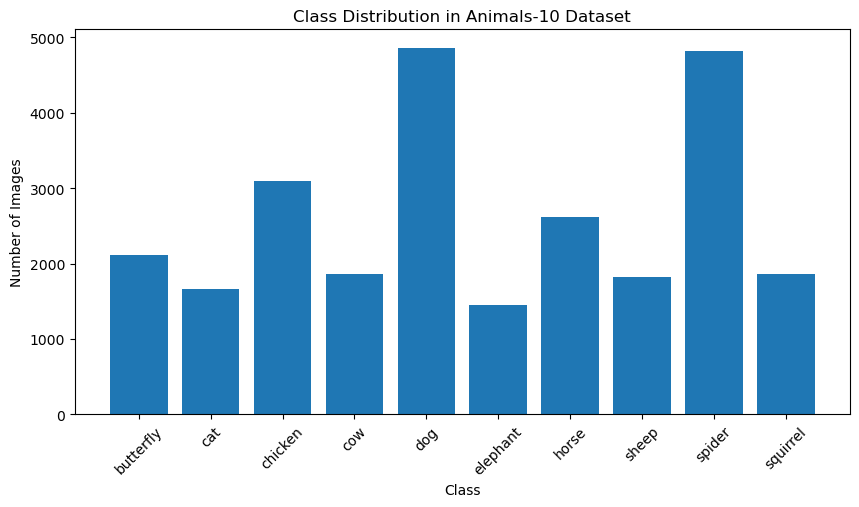

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Animals-10 Dataset")
plt.show()


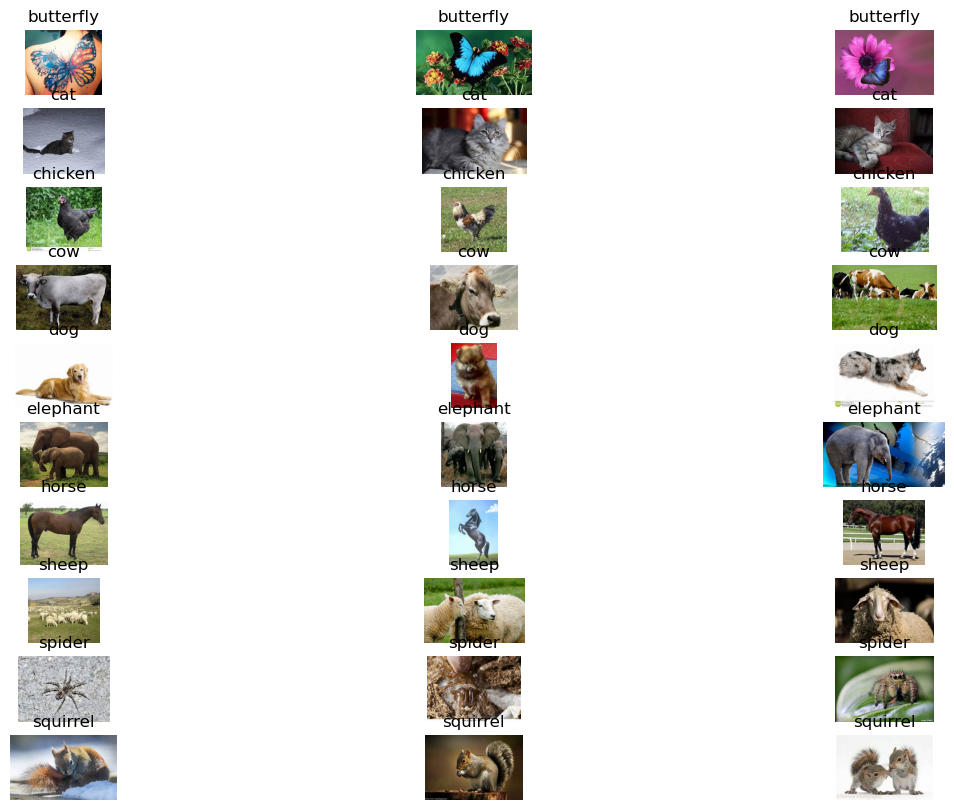

In [6]:
import cv2
import random

def show_images(dataset_path, classes, num_images=3):
    plt.figure(figsize=(15, 10))

    for i, cls in enumerate(classes):
        class_path = os.path.join(dataset_path, cls)
        images = os.listdir(class_path)
        random_images = random.sample(images, min(num_images, len(images)))

        for j, img_name in enumerate(random_images):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV читає в BGR, тому конвертуємо в RGB

            plt.subplot(len(classes), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls)

    plt.show()

# Відображаємо зображення
show_images(dataset_path, classes)


In [8]:
image_sizes = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)

    for img_name in images[:10]:  # Перевіримо перші 10 зображень кожного класу
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])  # (height, width)

# Виведемо унікальні розміри
unique_sizes = set(image_sizes)
print(f"Unique image sizes: {unique_sizes}")


Unique image sizes: {(263, 300), (210, 300), (188, 300), (199, 300), (416, 640), (157, 300), (214, 300), (300, 291), (640, 640), (216, 288), (300, 300), (464, 640), (225, 300), (640, 426), (300, 251), (300, 254), (424, 640), (457, 640), (185, 300), (218, 300), (264, 300), (300, 205), (349, 640), (360, 640), (160, 240), (300, 153), (230, 300), (150, 150), (300, 226), (241, 300), (220, 300), (101, 300), (439, 640), (426, 640), (417, 640), (200, 300), (640, 425), (463, 640), (169, 300), (300, 247), (375, 640), (213, 300), (454, 640), (182, 300), (204, 300), (423, 640), (226, 300), (421, 640), (173, 300), (425, 640), (401, 640), (480, 640), (300, 200)}


In [10]:
!pip install imgaug


   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ---------------------------------------- 10.2/948.0 kB ? eta -:--:--
   - ------------------------------------- 41.0/948.0 kB 653.6 kB/s eta 0:00:02
   ----- ---------------------------------- 122.9/948.0 kB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 276.5/948.0 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  942.1/948.0 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 948.0/948.0 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------  1.4/1.4 MB 30.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 30.5 MB/s eta 0:00:00


In [32]:
target_samples = max([len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes]) + 500


In [34]:
import os

dataset_path = r"C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10"

# Отримуємо оновлені класи
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Визначаємо новий рівень балансування
target_samples = max([len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes]) + 500

# Перевіряємо, чи запускається цикл аугментації
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)
    print(f"🔹 {cls}: {len(images)} images → target {target_samples}")
    if len(images) >= target_samples:
        print(f"✅ {cls} вже має достатньо зображень, аугментація не потрібна.")


🔹 butterfly: 2112 images → target 5363
🔹 cat: 1668 images → target 5363
🔹 chicken: 3098 images → target 5363
🔹 cow: 1866 images → target 5363
🔹 dog: 4863 images → target 5363
🔹 elephant: 1446 images → target 5363
🔹 horse: 2623 images → target 5363
🔹 sheep: 1820 images → target 5363
🔹 spider: 4821 images → target 5363
🔹 squirrel: 1862 images → target 5363


In [36]:
import os
import cv2
import numpy as np
import imgaug.augmenters as iaa
from tqdm import tqdm

# Шлях до датасету
dataset_path = r"C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10"

# Отримуємо оновлені класи
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Мінімальна кількість зображень для балансування (середній рівень)
target_samples = max([len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes])

# Аугментація
augmenters = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Affine(rotate=(-20, 20)),
    iaa.Multiply((0.8, 1.2)),
    iaa.GaussianBlur(sigma=(0, 1.0))
])

# Додаємо аугментовані зображення
for cls in tqdm(classes):
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)

    print(f"🔹 Augmenting {cls}: {len(images)} images → target {target_samples}")

    while len(images) < target_samples:
        img_name = np.random.choice(images)
        img_path = os.path.join(class_path, img_name)

        img = cv2.imread(img_path)
        if img is None:
            print(f"❌ Skipping {img_name} (could not read file)")
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Аугментація
        augmented_img = augmenters(image=img)

        # Створюємо унікальне ім'я
        new_img_name = f"aug_{len(images)}.jpg"
        save_path = os.path.join(class_path, new_img_name)

        # Записуємо файл і перевіряємо, чи він збережений
        cv2.imwrite(save_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))
        if os.path.exists(save_path):
            images.append(new_img_name)  # Додаємо файл до списку
            print(f"✅ Saved: {save_path}")
        else:
            print(f"❌ Failed to save: {save_path}")

print("✅ Data Augmentation Completed!")


  0%|          | 0/10 [00:00<?, ?it/s]

🔹 Augmenting butterfly: 2112 images → target 4863
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_2112.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_2113.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_2114.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_2115.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_2116.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_2117.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_2118.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_2119.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_

 10%|█         | 1/10 [00:21<03:15, 21.71s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_4855.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_4856.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_4857.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_4858.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_4859.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_4860.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_4861.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\butterfly\aug_4862.jpg
🔹 Augmenting cat: 1668 images → target 4863
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Tes

 20%|██        | 2/10 [01:04<04:34, 34.36s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4851.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4852.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4853.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4854.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4855.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4856.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4857.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4858.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cat\aug_4859.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Wins

 30%|███       | 3/10 [01:21<03:02, 26.06s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4839.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4840.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4841.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4842.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4843.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4844.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4845.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4846.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\chicken\aug_4847.jpg
✅ Saved: C

 40%|████      | 4/10 [01:45<02:32, 25.35s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4846.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4847.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4848.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4849.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4850.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4851.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4852.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4853.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\cow\aug_4854.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Wins

 60%|██████    | 6/10 [02:11<01:15, 18.77s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4838.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4839.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4840.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4841.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4842.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4843.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4844.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4845.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\elephant\aug_4846.jpg
✅

 70%|███████   | 7/10 [02:30<00:56, 18.79s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4847.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4848.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4849.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4850.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4851.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4852.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4853.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4854.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\horse\aug_4855.jpg
✅ Saved: C:\Users\ajuli\Docu

 80%|████████  | 8/10 [02:54<00:40, 20.31s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4843.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4844.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4845.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4846.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4847.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4848.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4849.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4850.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\sheep\aug_4851.jpg
✅ Saved: C:\Users\ajuli\Docu

 90%|█████████ | 9/10 [02:54<00:14, 14.62s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4845.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4846.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4847.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4848.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4849.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4850.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4851.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4852.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\spider\aug_4853.jpg
✅ Saved: C:\Users\a

100%|██████████| 10/10 [03:17<00:00, 19.71s/it]

✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\squirrel\aug_4861.jpg
✅ Saved: C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10\squirrel\aug_4862.jpg
✅ Data Augmentation Completed!


In [41]:
import os

dataset_path = r"C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10"

# Оновлюємо кількість зображень у кожному класі
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))}

print("✅ Updated class counts:", class_counts)


✅ Updated class counts: {'butterfly': 4863, 'cat': 4863, 'chicken': 4863, 'cow': 4863, 'dog': 4863, 'elephant': 4863, 'horse': 4863, 'sheep': 4863, 'spider': 4863, 'squirrel': 4863}


In [43]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Отримуємо оновлений список класів
class_labels = sorted(class_counts.keys())

# Створюємо список міток згідно з оновленою кількістю зображень
y_labels = []
for cls in class_labels:
    y_labels.extend([cls] * class_counts[cls])  

# Обчислюємо ваги для кожного класу
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array(class_labels),
    y=y_labels
)

# Формуємо словник для використання в моделі
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("🔹 Corrected Class Weights:", class_weight_dict)


🔹 Corrected Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


In [45]:
image_sizes = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)

    for img_name in images[:10]:  # Перевіримо перші 10 зображень кожного класу
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])  # (height, width)

# Виведемо унікальні розміри
unique_sizes = set(image_sizes)
print(f"Unique image sizes: {unique_sizes}")

Unique image sizes: {(210, 300), (188, 300), (221, 300), (199, 300), (278, 300), (214, 300), (300, 291), (204, 250), (201, 300), (216, 288), (300, 300), (225, 300), (300, 251), (236, 300), (300, 254), (402, 640), (207, 300), (218, 300), (264, 300), (300, 205), (300, 153), (150, 150), (300, 284), (300, 281), (300, 226), (241, 300), (220, 300), (101, 300), (426, 640), (300, 299), (200, 300), (300, 189), (169, 300), (640, 489), (300, 247), (213, 300), (246, 300), (300, 277), (182, 300), (300, 286), (261, 300), (173, 300), (533, 640), (239, 300), (195, 300), (216, 289), (300, 240), (296, 300), (142, 300), (300, 255), (300, 200)}


In [47]:
# Налаштування
dataset_path = r"C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10"
target_size = (128, 128)  # Новий розмір зображень

# Проходимо по всіх класах
for cls in tqdm(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, cls)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)

        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                # Масштабуємо зображення
                resized_img = cv2.resize(img, target_size)

                # Перезаписуємо зображення
                cv2.imwrite(img_path, resized_img)

print("✅ All images resized to", target_size)


100%|██████████| 11/11 [03:03<00:00, 16.66s/it]

✅ All images resized to (128, 128)


In [49]:
image_sizes = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)

    for img_name in images[:10]:  # Перевіримо перші 10 зображень кожного класу
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])  # (height, width)

# Виведемо унікальні розміри
unique_sizes = set(image_sizes)
print(f"Unique image sizes: {unique_sizes}")

Unique image sizes: {(128, 128)}


In [53]:
import shutil  # Бібліотека для переміщення файлів

# Шлях до датасету
dataset_path = r"C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets\Animals-10"
split_path = r"C:\Users\ajuli\Documents\AI Test\Winstars_AI_DS_Test\Task_2\datasets_split"

# Відсотки розбиття
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Створюємо папки `train/`, `val/`, `test/`
for split in ["train", "val", "test"]:
    split_dir = os.path.join(split_path, split)
    os.makedirs(split_dir, exist_ok=True)

# Розподіл файлів
for cls in tqdm(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, cls)
    
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)  # Перемішуємо зображення

        # Ділимо файли
        train_split = int(len(images) * train_ratio)
        val_split = int(len(images) * (train_ratio + val_ratio))

        train_files = images[:train_split]
        val_files = images[train_split:val_split]
        test_files = images[val_split:]

        # Створюємо підпапки для класів у `train/`, `val/`, `test/`
        for split, split_files in zip(["train", "val", "test"], [train_files, val_files, test_files]):
            split_class_dir = os.path.join(split_path, split, cls)
            os.makedirs(split_class_dir, exist_ok=True)

            for img_name in split_files:
                src = os.path.join(class_path, img_name)
                dst = os.path.join(split_class_dir, img_name)
                shutil.move(src, dst)  # Переміщуємо файл

print("✅ Data successfully split into train/val/test!")


100%|██████████| 11/11 [00:11<00:00,  1.03s/it]

✅ Data successfully split into train/val/test!
